In this project we want to make an **autoencoder** based on **fully connected neural networks** for **MNIST** images.
Next level is making a **classifier** that can classify encoded images.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import os
import tensorflow as tf
from tensorflow.keras.utils import to_categorical
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import confusion_matrix

In [2]:
current_dir = os.getcwd()
(X_train, Y_train), (X_test, Y_test) = tf.keras.datasets.mnist.load_data(path=current_dir+'/mnist.npz')

11490434/11490434 [==============================] - 0s 0us/step


In [3]:
print('MNIST Dataset Shape:')
print('X_train: ' + str(X_train.shape))
print('Y_train: ' + str(Y_train.shape))
print('X_test:  '  + str(X_test.shape))
print('Y_test:  '  + str(Y_test.shape))

MNIST Dataset Shape:
X_train: (60000, 28, 28)
Y_train: (60000,)
X_test:  (10000, 28, 28)
Y_test:  (10000,)


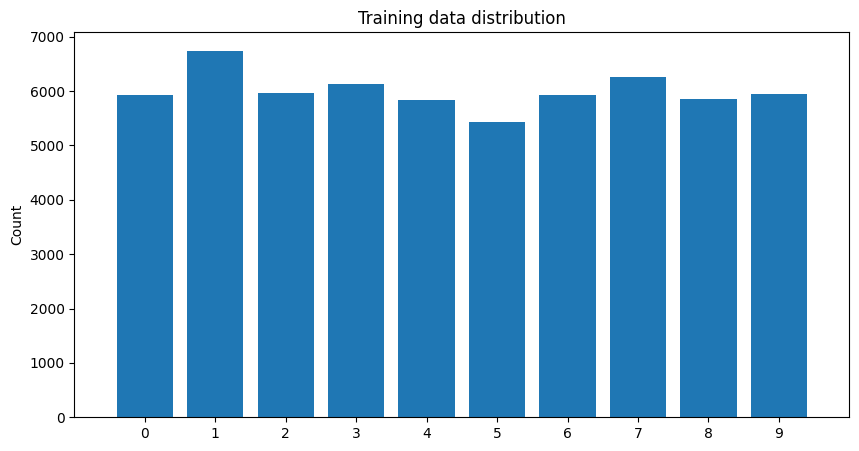

In [4]:
counts = np.bincount(Y_train)


fig, ax = plt.subplots(figsize=(10,5))
ax.bar(range(10), counts, width=0.8, align='center')
ax.set(xticks=range(10), xlim=[-1, 10], title='Training data distribution',ylabel="Count")

plt.show()

In [5]:
def display_mnist_samples(image_array,
                          size=5,
                          figsize=(10,10),
                          **imshow_kwargs):
    number_of_samples = image_array.shape[0]
    random_indices = np.random.choice(number_of_samples, 
                                      size=size, 
                                      replace=False)

    fig, axes = plt.subplots(np.abs((size/3)+1).astype(int), 3, figsize=figsize)
    
    
    for i in range(np.abs((size/3)+1).astype(int)):  
        for j in range(3):
            axes[i, j].imshow(
                image_array[random_indices[i+j], :, :],
                cmap = imshow_kwargs.get('cmap', None),
                norm = imshow_kwargs.get('norm', None),
                aspect = imshow_kwargs.get('aspect', None),
                interpolation = imshow_kwargs.get('interpolation', None),
                alpha = imshow_kwargs.get('alpha', None),
                vmin = imshow_kwargs.get('vmin', None),
                vmax = imshow_kwargs.get('vmax', None),
                origin = imshow_kwargs.get('origin', None),
                extent = imshow_kwargs.get('extent', None),
                filternorm = imshow_kwargs.get('filternorm', 1),
                filterrad = imshow_kwargs.get('filterrad', 4.0),
                resample = imshow_kwargs.get('resample', None),
                url = imshow_kwargs.get('url', None)
            )

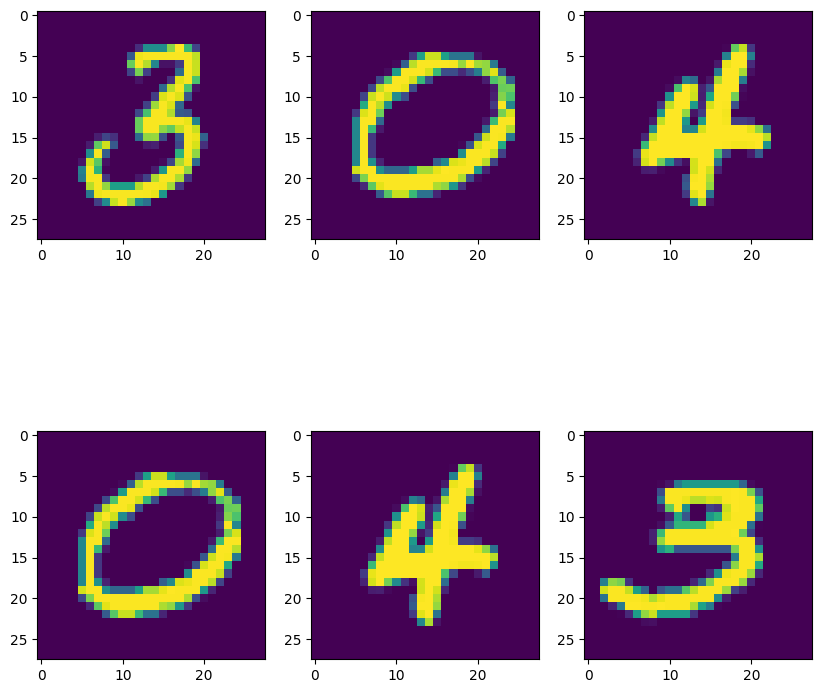

In [6]:
display_mnist_samples(X_train)

In [7]:
X_train = np.reshape(X_train, (-1, 784))
X_test = np.reshape(X_test, (-1, 784))

In [8]:
print('MNIST Dataset Shape:')
print('X_train: ' + str(X_train.shape))
print('X_test:  '  + str(X_test.shape))


MNIST Dataset Shape:
X_train: (60000, 784)
X_test:  (10000, 784)


In [9]:
# normalize
X_train = X_train.astype('float32') / 255
X_test = X_test.astype('float32') / 255

#Converting the labels into a one-hot vector
Y_train = to_categorical(Y_train)
Y_test = to_categorical(Y_test)


In [10]:
encoding_dim = 30
input_img = keras.Input(shape=(784,))

encoded = layers.Dense(500,activation='relu')(input_img)
encoded = layers.Dense(256,activation='relu')(encoded)
encoded = layers.Dense(100,activation='relu')(encoded)
encoded = layers.Dense(encoding_dim,activation='relu')(encoded)

decoded = layers.Dense(100,activation='relu')(encoded)
decoded = layers.Dense(256,activation='relu')(decoded)
decoded = layers.Dense(500,activation='relu')(decoded)
decoded = layers.Dense(784, activation='sigmoid')(decoded)

autoencoder = keras.Model(input_img, decoded)

Let's also create a separate encoder & decoder model:



In [11]:
encoder = keras.Model(input_img,encoded)

In [12]:
encoded_input = keras.Input(shape=(encoding_dim,))

decoder_layer = autoencoder.layers[-4](encoded_input)
decoder_layer = autoencoder.layers[-3](decoder_layer)
decoder_layer = autoencoder.layers[-2](decoder_layer)
decoder_layer = autoencoder.layers[-1](decoder_layer)

decoder = keras.Model(encoded_input, decoder_layer)

Now let's train our autoencoder to reconstruct MNIST digits.

In [13]:
autoencoder.compile(optimizer='adam', loss='binary_crossentropy')


In [14]:
history = autoencoder.fit(X_train, X_train,
                epochs=70,
                batch_size=256,
                shuffle=True,
                validation_data=(X_test, X_test))

Epoch 1/70
235/235 [==============================] - 9s 7ms/step - loss: 0.2281 - val_loss: 0.1463
Epoch 2/70
235/235 [==============================] - 2s 7ms/step - loss: 0.1331 - val_loss: 0.1212
Epoch 3/70
235/235 [==============================] - 2s 7ms/step - loss: 0.1171 - val_loss: 0.1111
Epoch 4/70
235/235 [==============================] - 1s 6ms/step - loss: 0.1081 - val_loss: 0.1036
Epoch 5/70
235/235 [==============================] - 1s 6ms/step - loss: 0.1020 - val_loss: 0.0990
Epoch 6/70
235/235 [==============================] - 1s 6ms/step - loss: 0.0979 - val_loss: 0.0955
Epoch 7/70
235/235 [==============================] - 1s 6ms/step - loss: 0.0950 - val_loss: 0.0936
Epoch 8/70
235/235 [==============================] - 1s 6ms/step - loss: 0.0931 - val_loss: 0.0918
Epoch 9/70
235/235 [==============================] - 1s 6ms/step - loss: 0.0913 - val_loss: 0.0908
Epoch 10/70
235/235 [==============================] - 1s 6ms/step - loss: 0.0899 - val_loss: 0.0889

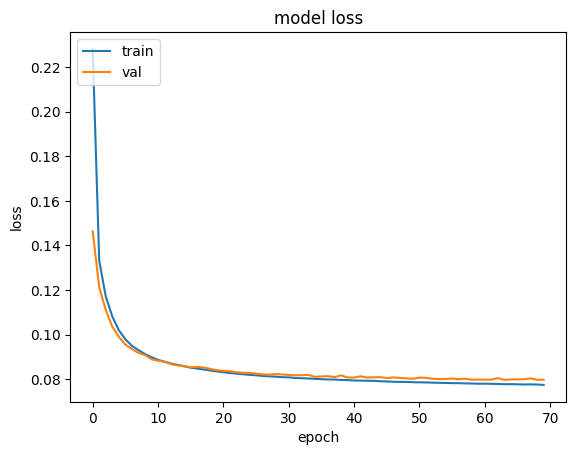

In [15]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

In [16]:
encoded_imgs = encoder.predict(X_test)
decoded_imgs = decoder.predict(encoded_imgs)

313/313 [==============================] - 1s 2ms/step


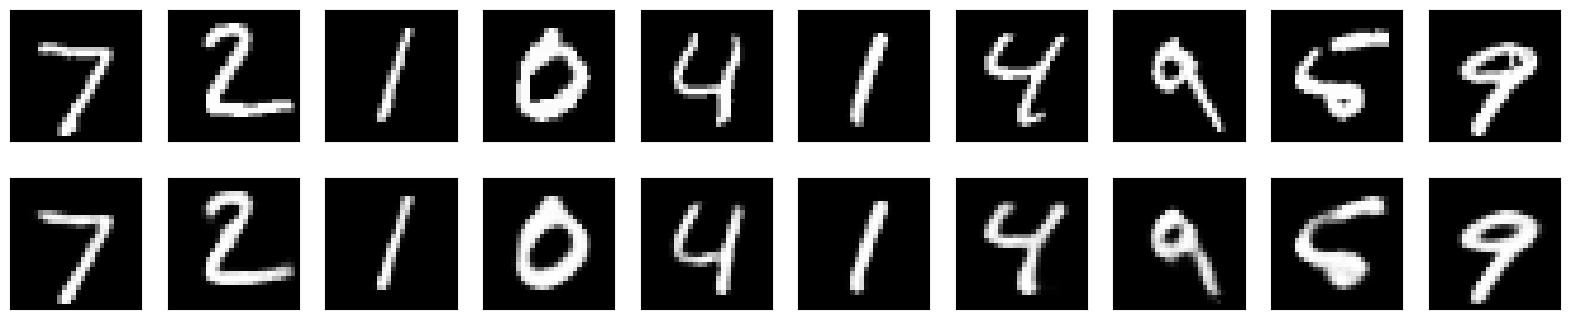

In [17]:
n = 10  # How many digits we will display
plt.figure(figsize=(20, 4))
for i in range(n):
    # Display original
    ax = plt.subplot(2, n, i + 1)
    plt.imshow(X_test[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # Display reconstruction
    ax = plt.subplot(2, n, i + 1 + n)
    plt.imshow(decoded_imgs[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()

In [18]:
classifier = Sequential()
classifier.add(layers.Dense(20, input_shape=(encoding_dim,), activation='relu'))
classifier.add(layers.Dense(15, activation='relu'))
classifier.add(layers.Dense(10, activation='sigmoid'))

In [19]:
def perplexity(y_true, y_pred):
    cross_entropy = keras.backend.categorical_crossentropy(y_true, y_pred)
    perplexity = keras.backend.exp(cross_entropy)
    return perplexity

In [20]:
classifier.compile(loss=perplexity, optimizer='adam', metrics=['accuracy'])

In [21]:
encoded_imgs_train = encoder.predict(X_train)
encoded_imgs_test = encoder.predict(X_test)

313/313 [==============================] - 1s 2ms/step


In [22]:
classifier_hist = classifier.fit(encoded_imgs_train, Y_train, epochs=150, batch_size=256,validation_data=(encoded_imgs_test, Y_test))

Epoch 1/150
235/235 [==============================] - 2s 4ms/step - loss: 491839.4688 - accuracy: 0.0761 - val_loss: 1363.9940 - val_accuracy: 0.0649
Epoch 2/150
235/235 [==============================] - 1s 4ms/step - loss: 368.9866 - accuracy: 0.0662 - val_loss: 124.4277 - val_accuracy: 0.0674
Epoch 3/150
235/235 [==============================] - 1s 4ms/step - loss: 92.0180 - accuracy: 0.0650 - val_loss: 66.0137 - val_accuracy: 0.0650
Epoch 4/150
235/235 [==============================] - 1s 5ms/step - loss: 58.6099 - accuracy: 0.0637 - val_loss: 52.0367 - val_accuracy: 0.0633
Epoch 5/150
235/235 [==============================] - 1s 5ms/step - loss: 48.4174 - accuracy: 0.0626 - val_loss: 46.6347 - val_accuracy: 0.0605
Epoch 6/150
235/235 [==============================] - 1s 4ms/step - loss: 43.5839 - accuracy: 0.0630 - val_loss: 43.1903 - val_accuracy: 0.0622
Epoch 7/150
235/235 [==============================] - 1s 3ms/step - loss: 40.3269 - accuracy: 0.0646 - val_loss: 40.3332 

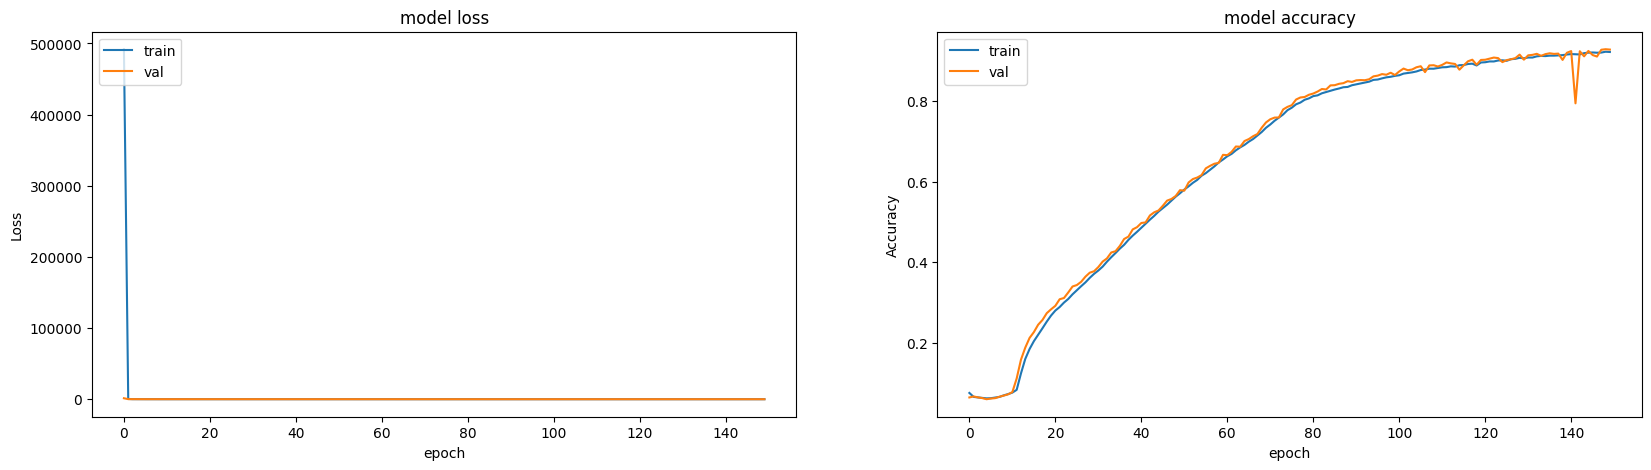

In [23]:
plt.figure(figsize=(20, 5))

ax = plt.subplot(1,2,1)
plt.plot(classifier_hist.history['loss'])
plt.plot(classifier_hist.history['val_loss'])
plt.title('model loss')
plt.ylabel('Loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')

ax = plt.subplot(1,2,2)
plt.plot(classifier_hist.history['accuracy'])
plt.plot(classifier_hist.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')



In [24]:
y_proba = classifier.predict(encoded_imgs_test)
y_pred =y_proba.argmax(axis=-1)
Y_test = [np.argmax(y, axis=None, out=None) for y in Y_test]

313/313 [==============================] - 0s 1ms/step


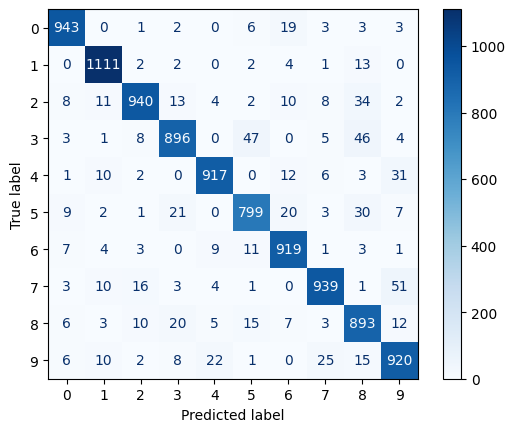

In [25]:
cm = confusion_matrix(Y_test, y_pred)

disp = ConfusionMatrixDisplay(confusion_matrix=cm)

disp.plot(cmap=plt.cm.Blues)
plt.show()

In [28]:
encoder.save('encoder.h5')
decoder.save('decoder.h5')
classifier.save('classifier.h5')
autoencoder.save('autoencoder.h5')